<a href="https://colab.research.google.com/github/haleemiliyash/ASAP-polaris-blind-challenge-Ligand-ADMET-property-prediction-/blob/main/Polaris_ADMET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# asap-discovery/antiviral-admet-2025

Absorption, Distribution, Metabolism, Excretion, Toxicology - or ADMET - endpoints sit in the middle of the assay cascade and can make or break preclinical candidate molecules. For this blind challenge we selected several crucial endpoints for the community to predict:

**Mouse Liver Microsomal stability (MLM, protocol)**: This is a stability assay that tests how quickly a molecule gets broken down by mouse liver microsomes. This is a useful assay that can be used as an estimate on how long a molecule will reside in the mouse body before it gets cleared.

**Human Liver Microsomal stability (HLM, protocol):** This is a stability assay that tests how quickly a molecule gets broken down by human liver microsomes. This is a useful assay that can be used as an estimate on how long a molecule will reside in the human body before it gets cleared.

**Solubility (KSOL, protocol):** solubility is essential for drug molecules: this heavily affects the pharmacokinetic and dynamics ('PKPD') of the molecule in the human body.

**LogD (protocol):** like solubility - but then in fatty tissue - LogD is a measure of a molecule's lipophilicity, or how well it dissolves in fat. LogD is calculated by comparing a molecule's solubility in octanol, a fat-like substance, to its solubility in water.

**Cell permeation (MDR1-MDCKII, protocol):** MDCKII-MDR1 is a cell line that's used to model cell permeation i.e. how well drug compounds will permeate cell layers. For coronaviruses this is a critical endpoint because there is increasing evidence that afflictions such as long-covid are caused by (remnant) virus particles in the brain, and blood-brain-barrier (BBB) permeation is critical for drug candidates to reach the brain.

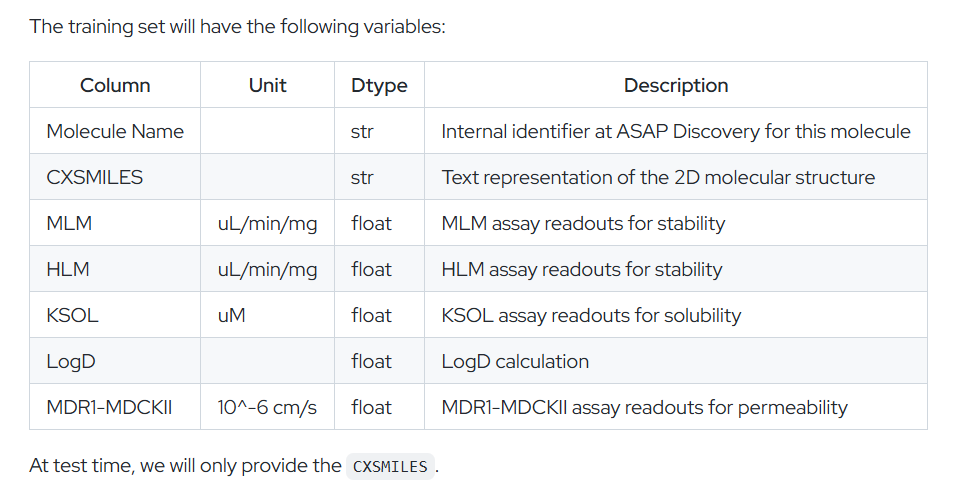


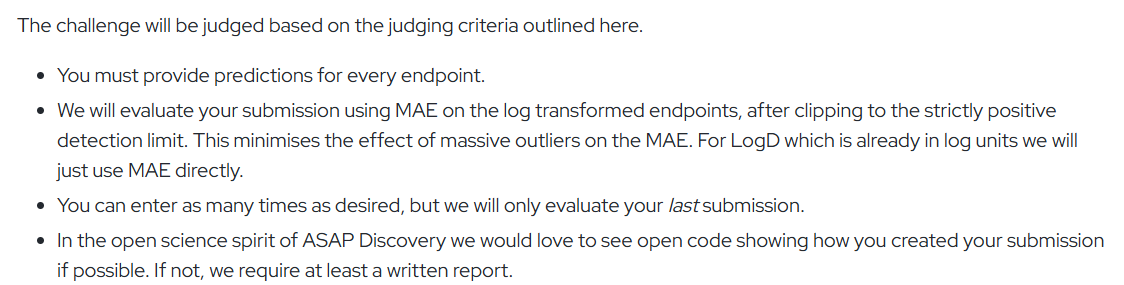

Refer Website:https://polarishub.io/competitions/asap-discovery/antiviral-admet-2025

In [1]:
!pip install polaris-lib

  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.1/116.1 kB 8.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 139.2/139.2 kB 15.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 495.4/495.4 kB 28.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.9/8.9 MB 90.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 210.6/210.6 kB 21.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.4/231.4 kB 20.9 MB/s eta 0:00:0

In [2]:
import polaris as po
from polaris.hub.client import PolarisHubClient

In [3]:
client = PolarisHubClient()# Portal Login
client.login()

[2025-02-25 14:56:24] INFO     Your browser has been opened to visit:                        ]8;id=770732;file:///usr/local/lib/python3.11/dist-packages/polaris/hub/external_client.py\external_client.py]8;;\:]8;id=234311;file:///usr/local/lib/python3.11/dist-packages/polaris/hub/external_client.py#149\149]8;;\
                               https://clerk.polarishub.io/oauth/authorize?response_type=cod                       
                               e&client_id=agQP2xVM6JqMHvGc&redirect_uri=https%3A%2F%2Fpolar                       
                               ishub.io%2Foauth2%2Fcallback&scope=profile+email&state=jlvSM0                       
                               3UYJ6kvB4bF7I5VLPNIjjUrq&code_challenge=-BOSvmsCy6c5svduWT3cO                       
                               nc9hy1tfvdj2JmLk3RW2Is&code_challenge_method=S256                                   
                                                                                                                   

INFO:polaris.hub.external_client:Your browser has been opened to visit:
https://clerk.polarishub.io/oauth/authorize?response_type=code&client_id=agQP2xVM6JqMHvGc&redirect_uri=https%3A%2F%2Fpolarishub.io%2Foauth2%2Fcallback&scope=profile+email&state=jlvSM03UYJ6kvB4bF7I5VLPNIjjUrq&code_challenge=-BOSvmsCy6c5svduWT3cOnc9hy1tfvdj2JmLk3RW2Is&code_challenge_method=S256



Please enter the authorization token: MTY0MZC5Y2ETNJVHNC0ZYME1LTHKNDCTMJA4OWNINJI4YZHL


[2025-02-25 14:56:44] INFO     Successfully authenticated to the Polaris Hub as              ]8;id=550504;file:///usr/local/lib/python3.11/dist-packages/polaris/hub/external_client.py\external_client.py]8;;\:]8;id=668177;file:///usr/local/lib/python3.11/dist-packages/polaris/hub/external_client.py#160\160]8;;\
                               `haleemiliyash@gmail.com`!                                                          

INFO:polaris.hub.external_client:Successfully authenticated to the Polaris Hub as `haleemiliyash@gmail.com`!


                      INFO     You are successfully logged in to the Polaris Hub.                     ]8;id=775398;file:///usr/local/lib/python3.11/dist-packages/polaris/hub/client.py\client.py]8;;\:]8;id=973220;file:///usr/local/lib/python3.11/dist-packages/polaris/hub/client.py#253\253]8;;\

INFO:polaris.hub.client:You are successfully logged in to the Polaris Hub.


In [4]:
CHALLENGE = "antiviral-admet-2025"  # or: "antiviral-potency-2025"

In [5]:
import polaris as po

competition = po.load_competition(f"asap-discovery/{CHALLENGE}")

[2025-02-25 14:57:03] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=355357;file:///usr/local/lib/python3.11/dist-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=700651;file:///usr/local/lib/python3.11/dist-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.9).                                                                           

INFO:polaris._artifact:The version of Polaris that was used to create the artifact (0.11.0) is different from the currently installed version of Polaris (0.11.9).


                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=57540;file:///usr/local/lib/python3.11/dist-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=287196;file:///usr/local/lib/python3.11/dist-packages/polaris/dataset/_base.py#181\181]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

In [6]:
competition.cache()

Output()

[14:57:51] Copying to destination                                                                      ]8;id=288192;file:///usr/local/lib/python3.11/dist-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=883011;file:///usr/local/lib/python3.11/dist-packages/polaris/dataset/_base.py#380\380]8;;\
           /root/.cache/polaris/datasets/5ffc062e-420f-4fec-b568-3813f9b65f89/data.zarr                            

           For large Zarr archives, this may take a while.                                             ]8;id=113843;file:///usr/local/lib/python3.11/dist-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=806054;file:///usr/local/lib/python3.11/dist-packages/polaris/dataset/_base.py#381\381]8;;\

[14:57:52]  Success: Copying Zarr keys                                                                ]8;id=629339;file:///usr/local/lib/python3.11/dist-packages/polaris/utils/context.py\context.py]8;;\:]8;id=826267;file:///usr/local/lib/python3.11/dist-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=86366;file:///usr/local/lib/python3.11/dist-packages/polaris/utils/context.py\context.py]8;;\:]8;id=684860;file:///usr/local/lib/python3.11/dist-packages/polaris/utils/context.py#53\53]8;;\

'/root/.cache/polaris/datasets/5ffc062e-420f-4fec-b568-3813f9b65f89'

In [7]:
competition


{
  "target_cols": [
    "MLM",
    "MDR1-MDCKII",
    "KSOL",
    "HLM",
    "LogD"
  ],
  "input_cols": [
    "CXSMILES"
  ],
  "metrics": [
    {
      "label": "pearsonr",
      "config": null,
      "kind": "default",
      "name": "pearsonr"
    },
    {
      "label": "mean_squared_error",
      "config": null,
      "kind": "default",
      "name": "mean_squared_error"
    },
    {
      "label": "spearmanr",
      "config": null,
      "kind": "default",
      "name": "spearmanr"
    },
    {
      "label": "mean_absolute_error",
      "config": null,
      "kind": "default",
      "name": "mean_absolute_error"
    },
    {
      "label": "r2",
      "config": null,
      "kind": "default",
      "name": "r2"
    }
  ],
  "main_metric": "mean_absolute_error",
  "target_types": {},
  "name": "antiviral-admet-2025",
  "description": "Absorption-Distribution-Metabolism-Excretion-Toxicology (ADMET) endpoints sit in the middle of the assay cascade and can make or break preclinical candidate molecules. For this blind challenge we selected several crucial endpoints for the community to predict.",
  "tags": [
    "ADMET",
    "Mpro",
    "SARS-CoV-2",
    "MERS-CoV"
  ],
  "user_attributes": {},
  "owner": "asap-discovery",
  "polaris_version": "0.11.0",
  "default_adapters": {},
  "zarr_root_path": "/root/.cache/polaris/datasets/5ffc062e-420f-4fec-b568-3813f9b65f89/data.zarr",
  "readme": "![banner](https://storage.polarishub.io/images/competitions/2024Q4_ASAP_Discovery/readme-banner-admet-v2.png)\n\nThis is the **ADMET** challenge, part of the [ASAP Discovery x OpenADMET challenge](https://polarishub.io/blog/antiviral-competition).\n\n# ADMET\n_Absorption, Distribution, Metabolism, Excretion, Toxicology_ - or ADMET - endpoints sit in the middle of the assay cascade and can make or break preclinical candidate molecules. For this blind challenge we selected several crucial endpoints for the community to predict:\n\n- Mouse Liver Microsomal stability (MLM, [protocol](https://dx.doi.org/10.17504/protocols.io.5qpvokdb9l4o/v1)): This is a stability assay that tests how quickly a molecule gets broken down by _mouse_ liver microsomes. This is a useful assay that can be used as an estimate on how long a molecule will reside in the mouse body before it gets cleared.\n- Human Liver Microsomal stability (HLM, [protocol](https://dx.doi.org/10.17504/protocols.io.5qpvokdb9l4o/v1)): This is a stability assay that tests how quickly a molecule gets broken down by _human_ liver microsomes. This is a useful assay that can be used as an estimate on how long a molecule will reside in the human body before it gets cleared.\n- Solubility (KSOL, [protocol](https://dx.doi.org/10.17504/protocols.io.j8nlk8y41l5r/v1)): solubility is essential for drug molecules: this heavily affects the pharmacokinetic and dynamics ('PKPD') of the molecule in the human body.\n- LogD ([protocol](https://dx.doi.org/10.17504/protocols.io.e6nvw14kdlmk/v1)): like solubility - but then in fatty tissue - LogD is a measure of a molecule's lipophilicity, or how well it dissolves in fat. LogD is calculated by comparing a molecule's solubility in octanol, a fat-like substance, to its solubility in water.\n- Cell permeation (MDR1-MDCKII, [protocol](https://dx.doi.org/10.17504/protocols.io.n2bvjne6ngk5/v1)):  MDCKII-MDR1 is a cell line that's used to model cell permeation i.e. how well drug compounds will permeate cell layers. For coronaviruses this is a critical endpoint because there is increasing evidence that afflictions such as long-covid are caused by (remnant) virus particles in the brain, and blood-brain-barrier (BBB) permeation is critical for drug candidates to reach the brain.\n\n## üìä Data\n\nThe training set will have the following variables: \n\n| Column | Unit | Dtype | Description |\n| --- | --- | --- | --- |\n| Molecule Name | | str | Internal identifier at ASAP Discovery for this molecule  |\n| CXSMILES | | str | Text representation of the 2D molecular structure

In [8]:
train, test = competition.get_train_test_split()

In [9]:
import pandas as pd

In [10]:
train[0]

('COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a:16|',
 {'MLM': nan, 'MDR1-MDCKII': 2.0, 'KSOL': nan, 'HLM': nan, 'LogD': 0.3})

In [11]:
train[1]

('O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(Cl)=CC(C2CC2)=C1 |&1:7|',
 {'MLM': nan, 'MDR1-MDCKII': 0.2, 'KSOL': 333.0, 'HLM': nan, 'LogD': 2.9})

In [12]:
test_DF=pd.DataFrame(test)
test_DF

0
0    CC(C)[C@H]1C2=C(CCN1C(=O)CC1=CN=CC3=CC=CC=C13)...
1          CC(C)C1(C)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1
2      O=C(CC1=CN=CC2=CC=CC=C12)N1CCC2=C(C=CS2)C12CCC2
3      CC1(CC(F)(F)F)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1
4    CCC1=CC=C([C@H]2C[C@H](C)CCN2C(=O)CC2=CN=CC3=C...
..                                                 ...
121  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...
122  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...
123  COC[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN...
124  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...
125  CC1=NC=C(CN2C[C@@]3(C(=O)N(C4=CN=CC5=CC=CC=C45...

[126 rows x 1 columns]

In [13]:
train_DF=pd.DataFrame(train)
train_DF

0  \
0    COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...   
1    O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...   
2    O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...   
3    NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...   
4     CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|   
..                                                 ...   
429        CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|   
430               O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl   
431          NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1   
432        COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1   
433  CC1=NC=CN1C[C@H]1CCC2=C(C1=O)C1=CC=CC=C1N2C |&...   

                                                     1  
0    {'MLM': nan, 'MDR1-MDCKII': 2.0, 'KSOL': nan, ...  
1    {'MLM': nan, 'MDR1-MDCKII': 0.2, 'KSOL': 333.0...  
2    {'MLM': nan, 'MDR1-MDCKII': 0.5, 'KSOL': nan, ...  
3    {'MLM': nan, 'MDR1-MDCKII': 8.5, 'KSOL': 376.0...  
4    {'MLM': nan, 'MDR1-MDCKII': 0.9, 'KSOL': 375.0...  
..                                                 ...  
429  {'MLM': 63.0, 'MDR1-MDCKII': nan, 'KSOL': nan,...  
430  {'MLM': 386.0, 'MDR1-MDCKII': nan, 'KSOL': nan...  
431  {'MLM': nan, 'MDR1-MDCKII': nan, 'KSOL': nan, ...  
432  {'MLM': nan, 'MDR1-MDCKII': nan, 'KSOL': nan, ...  
433  {'MLM': nan, 'MDR1-MDCKII': nan, 'KSOL': 127.0...  

[434 rows x 2 columns]

In [14]:
train_DF = train_DF.rename(columns={0:'CXSMILE'})
train_DF = train_DF.rename(columns={1:'ENDPOINT'})
train_DF

CXSMILE  \
0    COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...   
1    O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...   
2    O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...   
3    NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...   
4     CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|   
..                                                 ...   
429        CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|   
430               O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl   
431          NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1   
432        COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1   
433  CC1=NC=CN1C[C@H]1CCC2=C(C1=O)C1=CC=CC=C1N2C |&...   

                                              ENDPOINT  
0    {'MLM': nan, 'MDR1-MDCKII': 2.0, 'KSOL': nan, ...  
1    {'MLM': nan, 'MDR1-MDCKII': 0.2, 'KSOL': 333.0...  
2    {'MLM': nan, 'MDR1-MDCKII': 0.5, 'KSOL': nan, ...  
3    {'MLM': nan, 'MDR1-MDCKII': 8.5, 'KSOL': 376.0...  
4    {'MLM': nan, 'MDR1-MDCKII': 0.9, 'KSOL': 375.0...  
..                                                 ...  
429  {'MLM': 63.0, 'MDR1-MDCKII': nan, 'KSOL': nan,...  
430  {'MLM': 386.0, 'MDR1-MDCKII': nan, 'KSOL': nan...  
431  {'MLM': nan, 'MDR1-MDCKII': nan, 'KSOL': nan, ...  
432  {'MLM': nan, 'MDR1-MDCKII': nan, 'KSOL': nan, ...  
433  {'MLM': nan, 'MDR1-MDCKII': nan, 'KSOL': 127.0...  

[434 rows x 2 columns]

#Expolaratory Data Analysis(EDA)

In [15]:
ENDPOINT_train_DF = pd.json_normalize(train_DF['ENDPOINT']) # concat the smile and End ponit
train_DF=pd.concat([train_DF, ENDPOINT_train_DF],axis=1)
train_DF

CXSMILE  \
0    COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...   
1    O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...   
2    O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...   
3    NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...   
4     CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|   
..                                                 ...   
429        CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|   
430               O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl   
431          NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1   
432        COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1   
433  CC1=NC=CN1C[C@H]1CCC2=C(C1=O)C1=CC=CC=C1N2C |&...   

                                              ENDPOINT    MLM  MDR1-MDCKII  \
0    {'MLM': nan, 'MDR1-MDCKII': 2.0, 'KSOL': nan, ...    NaN          2.0   
1    {'MLM': nan, 'MDR1-MDCKII': 0.2, 'KSOL': 333.0...    NaN          0.2   
2    {'MLM': nan, 'MDR1-MDCKII': 0.5, 'KSOL': nan, ...    NaN          0.5   
3    {'MLM': nan, 'MDR1-MDCKII': 8.5, 'KSOL': 376.0...    NaN          8.5   
4    {'MLM': nan, 'MDR1-MDCKII': 0.9, 'KSOL': 375.0...    NaN          0.9   
..                                                 ...    ...          ...   
429  {'MLM': 63.0, 'MDR1-MDCKII': nan, 'KSOL': nan,...   63.0          NaN   
430  {'MLM': 386.0, 'MDR1-MDCKII': nan, 'KSOL': nan...  386.0          NaN   
431  {'MLM': nan, 'MDR1-MDCKII': nan, 'KSOL': nan, ...    NaN          NaN   
432  {'MLM': nan, 'MDR1-MDCKII': nan, 'KSOL': nan, ...    NaN          NaN   
433  {'MLM': nan, 'MDR1-MDCKII': nan, 'KSOL': 127.0...    NaN          NaN   

      KSOL    HLM  LogD  
0      NaN    NaN   0.3  
1    333.0    NaN   2.9  
2      NaN    NaN   0.4  
3    376.0    NaN   1.0  
4    375.0    NaN  -0.3  
..     ...    ...   ...  
429    NaN   25.5   NaN  
430    NaN  216.0   NaN  
431    NaN    NaN   2.0  
432    NaN    NaN   2.9  
433  127.0    NaN   NaN  

[434 rows x 7 columns]

In [16]:
train_DF = train_DF.drop(['ENDPOINT'], axis=1)
train_DF

CXSMILE    MLM  MDR1-MDCKII  \
0    COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...    NaN          2.0   
1    O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...    NaN          0.2   
2    O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...    NaN          0.5   
3    NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...    NaN          8.5   
4     CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|    NaN          0.9   
..                                                 ...    ...          ...   
429        CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|   63.0          NaN   
430               O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl  386.0          NaN   
431          NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1    NaN          NaN   
432        COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1    NaN          NaN   
433  CC1=NC=CN1C[C@H]1CCC2=C(C1=O)C1=CC=CC=C1N2C |&...    NaN          NaN   

      KSOL    HLM  LogD  
0      NaN    NaN   0.3  
1    333.0    NaN   2.9  
2      NaN    NaN   0.4  
3    376.0    NaN   1.0  
4    375.0    NaN  -0.3  
..     ...    ...   ...  
429    NaN   25.5   NaN  
430    NaN  216.0   NaN  
431    NaN    NaN   2.0  
432    NaN    NaN   2.9  
433  127.0    NaN   NaN  

[434 rows x 6 columns]

In [17]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CXSMILE      434 non-null    object 
 1   MLM          303 non-null    float64
 2   MDR1-MDCKII  425 non-null    float64
 3   KSOL         365 non-null    float64
 4   HLM          301 non-null    float64
 5   LogD         352 non-null    float64
dtypes: float64(5), object(1)
memory usage: 20.5+ KB


In [18]:
train_DF.shape

(434, 6)

In [19]:
train_DF.isnull().sum()

CXSMILE          0
MLM            131
MDR1-MDCKII      9
KSOL            69
HLM            133
LogD            82
dtype: int64

#Visulaization of Data and Outlier

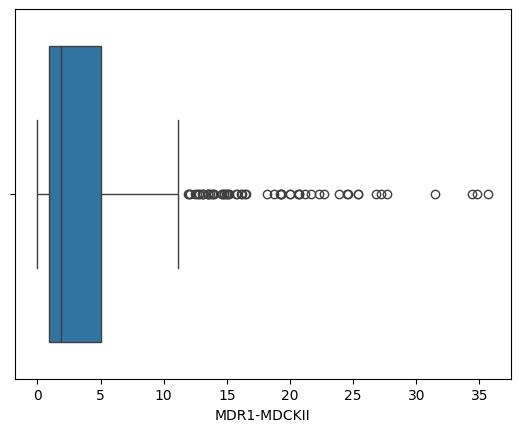

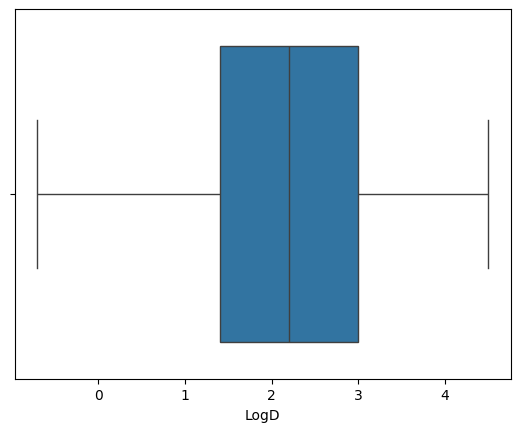

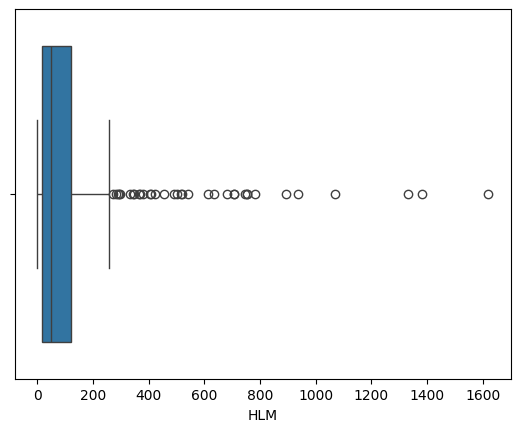

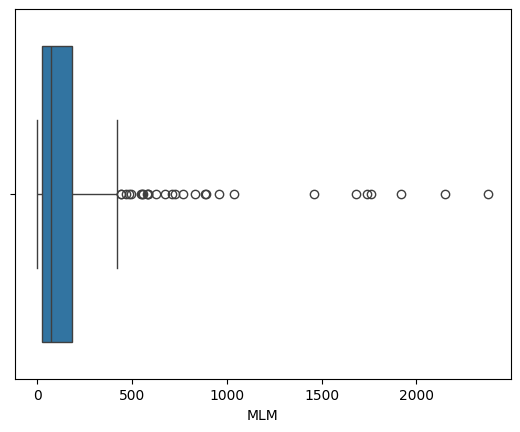

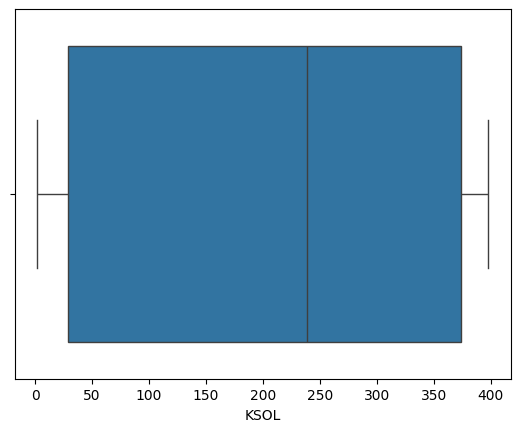

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
columns=['MDR1-MDCKII','LogD','HLM','MLM','KSOL']
for i in columns:
  sns.boxplot(x=train_DF[i])
  plt.xlabel(i)
  plt.show()

In [21]:
train_DF


CXSMILE    MLM  MDR1-MDCKII  \
0    COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...    NaN          2.0   
1    O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...    NaN          0.2   
2    O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...    NaN          0.5   
3    NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...    NaN          8.5   
4     CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|    NaN          0.9   
..                                                 ...    ...          ...   
429        CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|   63.0          NaN   
430               O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl  386.0          NaN   
431          NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1    NaN          NaN   
432        COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1    NaN          NaN   
433  CC1=NC=CN1C[C@H]1CCC2=C(C1=O)C1=CC=CC=C1N2C |&...    NaN          NaN   

      KSOL    HLM  LogD  
0      NaN    NaN   0.3  
1    333.0    NaN   2.9  
2      NaN    NaN   0.4  
3    376.0    NaN   1.0  
4    375.0    NaN  -0.3  
..     ...    ...   ...  
429    NaN   25.5   NaN  
430    NaN  216.0   NaN  
431    NaN    NaN   2.0  
432    NaN    NaN   2.9  
433  127.0    NaN   NaN  

[434 rows x 6 columns]

# In Sample dataset some target value are NAN so filling NaN value with similar Cxsimiles value and Converting the Cxsmile into Vector

In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import pandas as pd
import numpy as np
import pickle
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings

unique_dist = {}

i = "CXSMILE"  # Ensure column name matches exactly

# Store initial unique SMILES
unique_dist[f'{i}_initial'] = train_DF[i].unique().tolist()

# Convert SMILES to RDKit Morgan fingerprints (ExplicitBitVect)
def smiles_to_fingerprint(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)  # ExplicitBitVect
    return None

train_DF['fingerprint'] = train_DF[i].apply(smiles_to_fingerprint)

# Convert fingerprints to tuples for unique identification
fingerprint_tuples = []
for fp in train_DF["fingerprint"].dropna():
    arr = np.zeros((1,), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_tuples.append(tuple(arr))

# Store final unique fingerprints
unique_dist[f'{i}_Final'] = sorted(set(fingerprint_tuples))

# Save fingerprints dictionary as pickle
with open("smiles_fingerprints.pkl", "wb") as file:
    pickle.dump(unique_dist, file)

# Function to compute Tanimoto similarity between two RDKit fingerprints
def tanimoto_similarity(fp1, fp2):
    if fp1 is None or fp2 is None:
        return 0
    return DataStructs.FingerprintSimilarity(fp1, fp2)

# Columns with missing values to fill
cols = ['MLM', 'HLM', 'LogD', 'KSOL', 'MDR1-MDCKII']

for col in cols:
    # Find rows with missing values in the current column
    missing_indices = train_DF[train_DF[col].isna()].index

    for missing_index in missing_indices:
        # Get the fingerprint of the missing row
        missing_fp = train_DF.loc[missing_index, "fingerprint"]
        if missing_fp is None:
            continue  # Skip if no fingerprint

        # Compute similarities with other non-missing rows
        similarities = []
        for idx, row in train_DF.dropna(subset=[col]).iterrows():
            sim = tanimoto_similarity(missing_fp, row["fingerprint"])
            similarities.append((idx, sim))

        # Sort by similarity (highest first)
        similarities.sort(key=lambda x: x[1], reverse=True)

        # Impute value from the most similar structure
        if similarities:
            best_match_index = similarities[0][0]
            train_DF.at[missing_index, col] = train_DF.at[best_match_index, col]

# Display the updated DataFrame
print(train_DF)

[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerator
[14:59:16] DEPRECATION WARNING: please use MorganGenerat

                                               CXSMILE    MLM  MDR1-MDCKII  \
0    COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...    6.0         2.00   
1    O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...   10.6         0.20   
2    O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...   10.6         0.50   
3    NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...    6.0         8.50   
4     CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|    6.0         0.90   
..                                                 ...    ...          ...   
429        CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|   63.0         0.70   
430               O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl  386.0         7.59   
431          NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1    1.0         1.96   
432        COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1   11.7        14.60   
433  CC1=NC=CN1C[C@H]1CCC2=C(C1=O)C1=CC=CC=C1N2C |&...   12.0         1.30   

      KSOL    HLM  LogD                                        

# All NaN value filled

In [23]:
train_DF

CXSMILE    MLM  MDR1-MDCKII  \
0    COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...    6.0         2.00   
1    O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...   10.6         0.20   
2    O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...   10.6         0.50   
3    NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...    6.0         8.50   
4     CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|    6.0         0.90   
..                                                 ...    ...          ...   
429        CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|   63.0         0.70   
430               O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl  386.0         7.59   
431          NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1    1.0         1.96   
432        COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1   11.7        14.60   
433  CC1=NC=CN1C[C@H]1CCC2=C(C1=O)C1=CC=CC=C1N2C |&...   12.0         1.30   

      KSOL    HLM  LogD                                        fingerprint  
0    376.0    9.0   0.3  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1    333.0   17.1   2.9  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2    187.0   17.1   0.4  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3    376.0    9.0   1.0  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4    375.0    9.0  -0.3  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
..     ...    ...   ...                                                ...  
429  143.0   25.5   2.7  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
430  397.0  216.0   3.6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
431  375.0   21.0   2.0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
432  333.0   21.3   2.9  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  
433  127.0    1.0   0.2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[434 rows x 7 columns]

In [24]:
train_DF.isnull().sum()

CXSMILE        0
MLM            0
MDR1-MDCKII    0
KSOL           0
HLM            0
LogD           0
fingerprint    0
dtype: int64

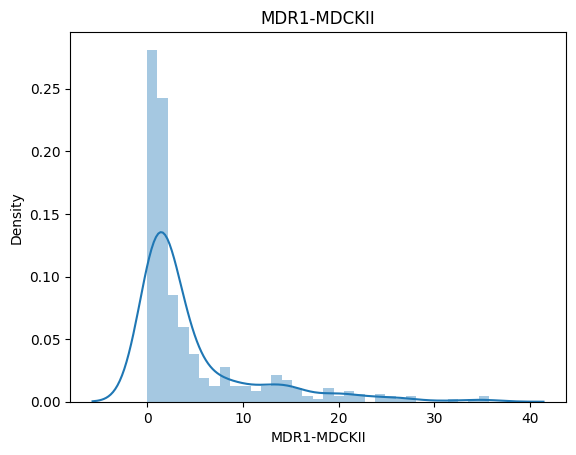

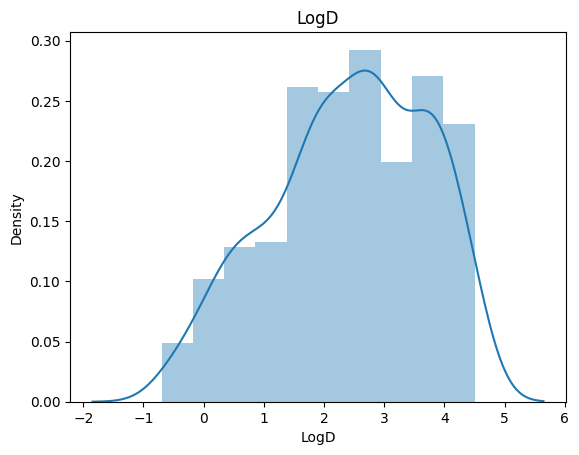

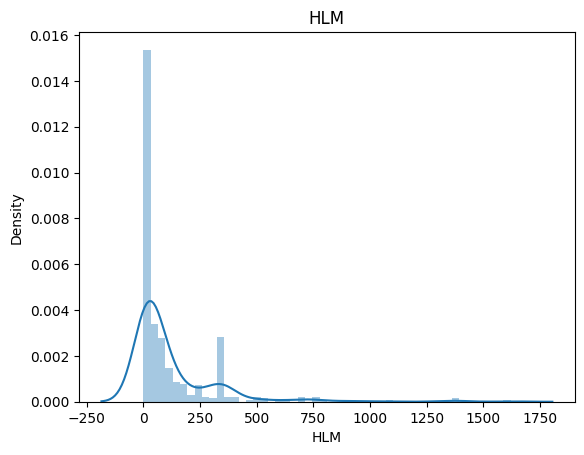

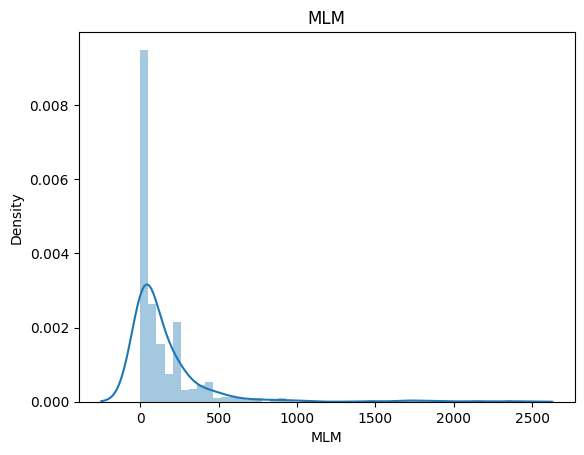

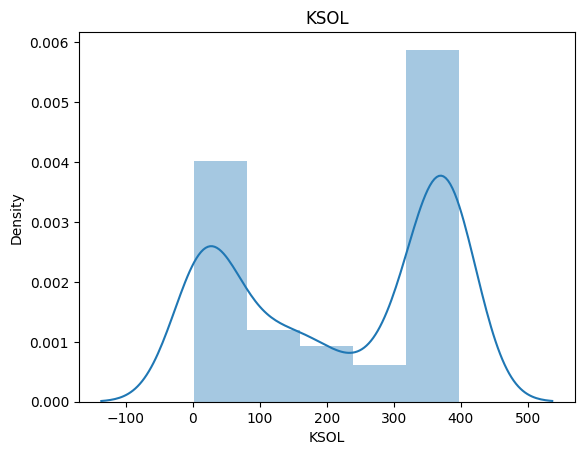

In [25]:
for i in columns:
    sns.distplot(train_DF[i])
    plt.title(i)
    plt.show()

# Used Lipinski descriptors for Feature Engineering

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:
*   Molecular weight < 500 Dalton
*   Octanol-water partition coefficient (LogP) < 5
*   Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10





In [26]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

# To calculate Lipinski descriptors
def get_lipinski_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mw = Descriptors.MolWt(mol)                           # Molecular Weight
        logp = Descriptors.MolLogP(mol)                      # LogP (Octanol-Water Partition Coefficient)
        hbd = Descriptors.NumHDonors(mol)                    # Number of Hydrogen Bond Donors
        hba = Descriptors.NumHAcceptors(mol)                 # Number of Hydrogen Bond Acceptors
        return pd.Series([mw, logp, hbd, hba])
    else:
        return pd.Series([None, None, None, None])

# Add Lipinski descriptors to DataFrame
train_DF[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']] = train_DF['CXSMILE'].apply(get_lipinski_descriptors)


In [27]:
train_DF

CXSMILE    MLM  MDR1-MDCKII  \
0    COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...    6.0         2.00   
1    O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...   10.6         0.20   
2    O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...   10.6         0.50   
3    NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...    6.0         8.50   
4     CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|    6.0         0.90   
..                                                 ...    ...          ...   
429        CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|   63.0         0.70   
430               O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl  386.0         7.59   
431          NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1    1.0         1.96   
432        COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1   11.7        14.60   
433  CC1=NC=CN1C[C@H]1CCC2=C(C1=O)C1=CC=CC=C1N2C |&...   12.0         1.30   

      KSOL    HLM  LogD                                        fingerprint  \
0    376.0    9.0   0.3  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1    333.0   17.1   2.9  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2    187.0   17.1   0.4  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3    376.0    9.0   1.0  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4    375.0    9.0  -0.3  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..     ...    ...   ...                                                ...   
429  143.0   25.5   2.7  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
430  397.0  216.0   3.6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
431  375.0   21.0   2.0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
432  333.0   21.3   2.9  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
433  127.0    1.0   0.2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

       MolWt     LogP  NumHDonors  NumHAcceptors  
0    311.769  2.07780         2.0            3.0  
1    484.772  5.11760         3.0            3.0  
2    450.287  3.46310         4.0            4.0  
3    286.331  1.69920         1.0            3.0  
4    261.325  0.65642         1.0            3.0  
..       ...      ...         ...            ...  
429  259.349  2.57750         2.0            3.0  
430  296.153  4.36410         2.0            2.0  
431  301.777  2.65420         3.0            3.0  
432  295.298  2.97220         2.0            4.0  
433  293.370  3.12852         0.0            4.0  

[434 rows x 11 columns]

# Finding skewness value

In [28]:
import scipy
columns=['MDR1-MDCKII','LogD','HLM','MLM','KSOL']
for j in columns:
  sk_value_1=scipy.stats.skew(train_DF[j], axis=0, bias=True)
  print(sk_value_1)

2.2691288054809524
-0.33245050737919446
3.4868813005403427
4.515523195608105
-0.23406157711093145


In [29]:
train_DF['MDR1-MDCKII'].max()

35.7

#Log transformation

In [30]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
data=train_DF['MDR1-MDCKII']
C = abs(np.min(data)) + 1  # Shift to make all values positive
train_DF['MDR1-MDCKII']= np.log1p(data + C)

In [31]:
train_DF['MDR1-MDCKII'].max()

3.629660094453965

In [32]:
sk_value_1=scipy.stats.skew(train_DF['MDR1-MDCKII'], axis=0, bias=True)
print(sk_value_1)

1.0141696209473519


In [33]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
col=['HLM','MLM','KSOL']
for i in col:
  data=train_DF[i]
  C = abs(np.min(data)) + 1  # Shift to make all values positive
  train_DF[i]= np.log1p(data + C)

In [34]:
import scipy
column=['MDR1-MDCKII','HLM','MLM']
for j in column:
  sk_value_1=scipy.stats.skew(train_DF[j], axis=0, bias=True)
  print(sk_value_1)

1.0141696209473519
0.3598946813717597
-0.03799762982863919


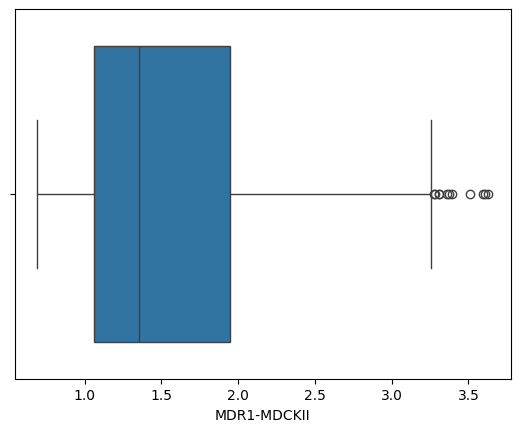

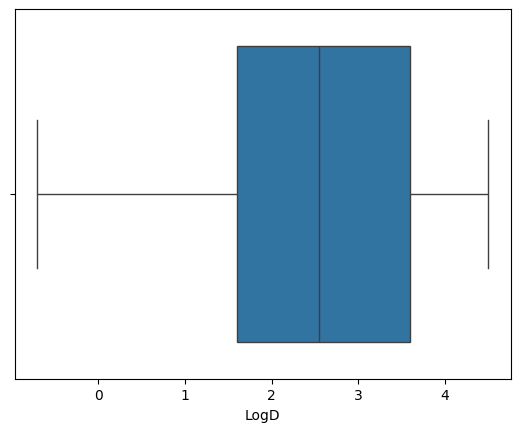

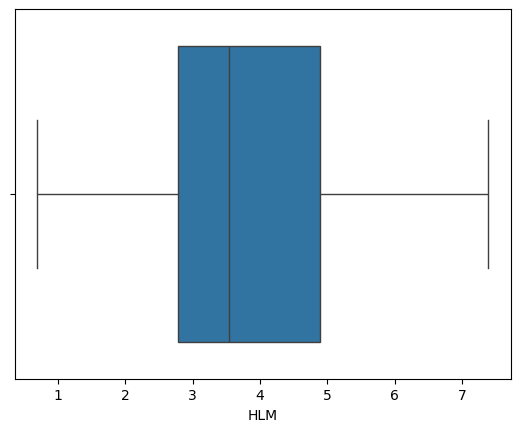

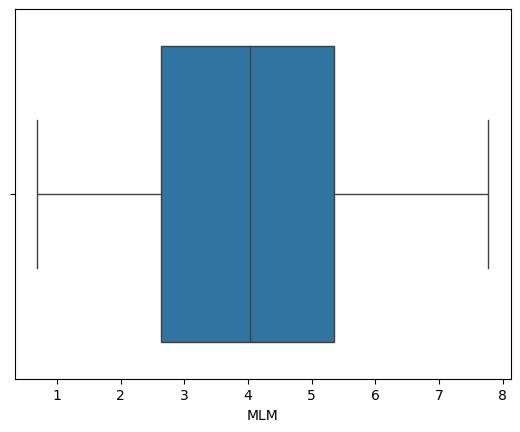

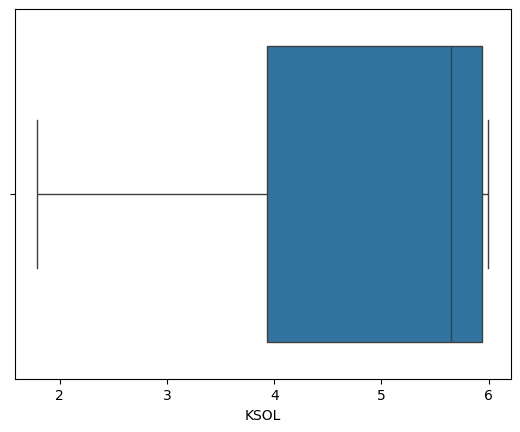

In [35]:
columns=['MDR1-MDCKII','LogD','HLM','MLM','KSOL']
for i in columns:
  sns.boxplot(x=train_DF[i])
  plt.xlabel(i)
  plt.show()

In [ ]:
train_DF['LogP'].max()

6.6520000000000055

#Correlation with Each feature

<Axes: >

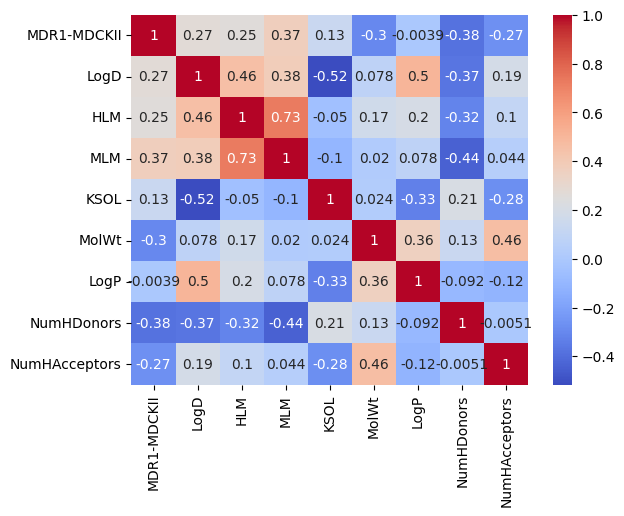

In [36]:
x=train_DF[['MDR1-MDCKII','LogD','HLM','MLM','KSOL','MolWt','LogP','NumHDonors','NumHAcceptors']].corr()
sns.heatmap(x, annot=True, cmap="coolwarm")

In [37]:
train_DF

CXSMILE       MLM  MDR1-MDCKII  \
0    COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a...  2.079442     1.386294   
1    O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(...  2.533697     0.788457   
2    O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=...  2.533697     0.916291   
3    NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&...  2.079442     2.351375   
4     CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11|  2.079442     1.064711   
..                                                 ...       ...          ...   
429        CC(C)NC[C@H](O)COC1=CC=CC2=CC=CC=C12 |&1:5|  4.174387     0.993252   
430               O=C(O)CC1=CC=CC=C1NC1=C(Cl)C=CC=C1Cl  5.961005     2.260721   
431          NCC1=CC(Cl)=CC(C(=O)NC2=CC=C3CNCC3=C2)=C1  1.098612     1.376244   
432        COC(=O)NC1=NC2=CC=C(C(=O)C3=CC=CC=C3)C=C2N1  2.617396     2.809403   
433  CC1=NC=CN1C[C@H]1CCC2=C(C1=O)C1=CC=CC=C1N2C |&...  2.639057     1.193922   

         KSOL       HLM  LogD  \
0    5.940171  2.397895   0.3   
1    5.820083  2.949688   2.9   
2    5.252273  2.949688   0.4   
3    5.940171  2.397895   1.0   
4    5.937536  2.397895  -0.3   
..        ...       ...   ...   
429  4.990433  3.314186   2.7   
430  5.993961  5.384495   3.6   
431  5.937536  3.135494   2.0   
432  5.820083  3.148453   2.9   
433  4.875197  1.098612   0.2   

                                           fingerprint    MolWt     LogP  \
0    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  311.769  2.07780   
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  484.772  5.11760   
2    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  450.287  3.46310   
3    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  286.331  1.69920   
4    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  261.325  0.65642   
..                                                 ...      ...      ...   
429  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  259.349  2.57750   
430  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  296.153  4.36410   
431  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  301.777  2.65420   
432  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  295.298  2.97220   
433  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  293.370  3.12852   

     NumHDonors  NumHAcceptors  
0           2.0            3.0  
1           3.0            3.0  
2           4.0            4.0  
3           1.0            3.0  
4           1.0            3.0  
..          ...            ...  
429         2.0            3.0  
430         2.0            2.0  
431         3.0            3.0  
432         2.0            4.0  
433         0.0            4.0  

[434 rows x 11 columns]

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

features=['MDR1-MDCKII','LogD','HLM','MLM','KSOL']
for i in features:
  X = np.array([list(map(int, fp)) for fp in train_DF['fingerprint']])
  other_feature = train_DF[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']].values

  x= np.hstack([X, other_feature])  # merge all feature
  y=train_DF[i].values
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )
   # Use Linear Regression
  model = LinearRegression()
  model.fit(x_train, y_train)

    # Predictions
  y_pred = model.predict(x_test)

    # Evaluation metrics
  r2_score = model.score(x_test, y_test)  # R¬≤ Score
  mae = mean_absolute_error(y_test, y_pred)  # MAE

  print(i)
  print(f"R¬≤ score for {i}: {r2_score:.4f}")
  print(f"MAE for {i}: {mae:.4f}")



MDR1-MDCKII
R¬≤ score for MDR1-MDCKII: 0.5101
MAE for MDR1-MDCKII: 0.4335
LogD
R¬≤ score for LogD: 0.7739
MAE for LogD: 0.4810
HLM
R¬≤ score for HLM: 0.4557
MAE for HLM: 0.6828
MLM
R¬≤ score for MLM: 0.5207
MAE for MLM: 0.7598
KSOL
R¬≤ score for KSOL: 0.5199
MAE for KSOL: 0.6448


# Decision tree regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

features = ['MDR1-MDCKII', 'LogD', 'HLM', 'MLM', 'KSOL']

for i in features:
    # Convert 'Fingerprint' to a numerical format
    X = np.array([list(map(int, fp)) for fp in train_DF['fingerprint']])
    other_feature = train_DF[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']].values

    x= np.hstack([X, other_feature])  # merge all feature
    y=train_DF[i].values

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

    # Initialize and train Decision Tree Regressor
    model = DecisionTreeRegressor(random_state=3)
    model.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)

    # Evaluation metrics
    r2_score = model.score(x_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{i}")
    print(f"R¬≤ score for {i}: {r2_score:.4f}")
    print(f"MAE for {i}: {mae:.4f}\n")

MDR1-MDCKII
R¬≤ score for MDR1-MDCKII: 0.2655
MAE for MDR1-MDCKII: 0.4506

LogD
R¬≤ score for LogD: 0.5713
MAE for LogD: 0.5208

HLM
R¬≤ score for HLM: 0.1933
MAE for HLM: 0.7031

MLM
R¬≤ score for MLM: 0.4635
MAE for MLM: 0.7063

KSOL
R¬≤ score for KSOL: 0.5016
MAE for KSOL: 0.4940



# Random forest regressor

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

features = ['MDR1-MDCKII', 'LogD', 'HLM', 'MLM', 'KSOL']

for i in features:
    # Convert 'Fingerprint' to a numerical format
    X = np.array([list(map(int, fp)) for fp in train_DF['fingerprint']])
    other_feature = train_DF[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']].values

    x= np.hstack([X, other_feature])  # merge all feature
    y=train_DF[i].values

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

    # Initialize and train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=3)
    model.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)

    # Evaluation metrics
    r2_score = model.score(x_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Feature: {i}")
    print(f"R¬≤ score for {i}: {r2_score:.4f}")
    print(f"MAE for {i}: {mae:.4f}\n")



Feature: MDR1-MDCKII
R¬≤ score for MDR1-MDCKII: 0.6722
MAE for MDR1-MDCKII: 0.3513

Feature: LogD
R¬≤ score for LogD: 0.7408
MAE for LogD: 0.4237

Feature: HLM
R¬≤ score for HLM: 0.5709
MAE for HLM: 0.5590

Feature: MLM
R¬≤ score for MLM: 0.6326
MAE for MLM: 0.6260

Feature: KSOL
R¬≤ score for KSOL: 0.6132
MAE for KSOL: 0.5354



#Gradient Boosting Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

features = ['MDR1-MDCKII', 'LogD', 'HLM', 'MLM', 'KSOL']

for i in features:
    # Convert 'Fingerprint' to a numerical format
    X = np.array([list(map(int, fp)) for fp in train_DF['fingerprint']])
    other_feature = train_DF[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']].values

    x= np.hstack([X, other_feature])  # merge all feature
    y=train_DF[i].values

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

    # Initialize and train Gradient Boosting Regressor
    model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=3)
    model.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)

    # Evaluation metrics
    r2_score = model.score(x_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Feature: {i}")
    print(f"R¬≤ score for {i}: {r2_score:.4f}")
    print(f"MAE for {i}: {mae:.4f}")
    print(f"MSE for {i}: {mse:.4f}\n")

Feature: MDR1-MDCKII
R¬≤ score for MDR1-MDCKII: 0.6020
MAE for MDR1-MDCKII: 0.3874
MSE for MDR1-MDCKII: 0.2526

Feature: LogD
R¬≤ score for LogD: 0.7177
MAE for LogD: 0.4969
MSE for LogD: 0.4816

Feature: HLM
R¬≤ score for HLM: 0.5535
MAE for HLM: 0.5838
MSE for HLM: 0.7951

Feature: MLM
R¬≤ score for MLM: 0.5231
MAE for MLM: 0.7623
MSE for MLM: 1.1168

Feature: KSOL
R¬≤ score for KSOL: 0.5863
MAE for KSOL: 0.6209
MSE for KSOL: 0.6522



# XG Boost Regression

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

features = ['MDR1-MDCKII', 'LogD', 'HLM', 'MLM', 'KSOL']

for i in features:
    # Convert 'Fingerprint' to a numerical format
    X = np.array([list(map(int, fp)) for fp in train_DF['fingerprint']])
    other_feature = train_DF[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']].values

    # Merge RDKit fingerprints with molecular descriptors
    x = np.hstack([X, other_feature])
    y = train_DF[i].values

    # Split the dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

    # Initialize and train XGBoost Regressor
    model = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=3,
        objective='reg:squarederror'
    )
    model.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)

    # Evaluation metrics
    r2_score = model.score(x_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Feature: {i}")
    print(f"R¬≤ score for {i}: {r2_score:.4f}")
    print(f"MAE for {i}: {mae:.4f}")
    print(f"MSE for {i}: {mse:.4f}\n")

Feature: MDR1-MDCKII
R¬≤ score for MDR1-MDCKII: 0.6324
MAE for MDR1-MDCKII: 0.3615
MSE for MDR1-MDCKII: 0.2333

Feature: LogD
R¬≤ score for LogD: 0.7324
MAE for LogD: 0.4266
MSE for LogD: 0.4565

Feature: HLM
R¬≤ score for HLM: 0.5546
MAE for HLM: 0.5360
MSE for HLM: 0.7931

Feature: MLM
R¬≤ score for MLM: 0.6229
MAE for MLM: 0.6507
MSE for MLM: 0.8831

Feature: KSOL
R¬≤ score for KSOL: 0.5649
MAE for KSOL: 0.5442
MSE for KSOL: 0.6859



In [39]:
test_DF

0
0    CC(C)[C@H]1C2=C(CCN1C(=O)CC1=CN=CC3=CC=CC=C13)...
1          CC(C)C1(C)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1
2      O=C(CC1=CN=CC2=CC=CC=C12)N1CCC2=C(C=CS2)C12CCC2
3      CC1(CC(F)(F)F)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1
4    CCC1=CC=C([C@H]2C[C@H](C)CCN2C(=O)CC2=CN=CC3=C...
..                                                 ...
121  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...
122  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...
123  COC[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN...
124  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...
125  CC1=NC=C(CN2C[C@@]3(C(=O)N(C4=CN=CC5=CC=CC=C45...

[126 rows x 1 columns]

In [40]:
test_DF = test_DF.rename(columns={0:'CXSMILE'})

In [41]:
test_DF

CXSMILE
0    CC(C)[C@H]1C2=C(CCN1C(=O)CC1=CN=CC3=CC=CC=C13)...
1          CC(C)C1(C)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1
2      O=C(CC1=CN=CC2=CC=CC=C12)N1CCC2=C(C=CS2)C12CCC2
3      CC1(CC(F)(F)F)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1
4    CCC1=CC=C([C@H]2C[C@H](C)CCN2C(=O)CC2=CN=CC3=C...
..                                                 ...
121  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...
122  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...
123  COC[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN...
124  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...
125  CC1=NC=C(CN2C[C@@]3(C(=O)N(C4=CN=CC5=CC=CC=C45...

[126 rows x 1 columns]

# Convert Fingerprint into Vector

In [42]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import pandas as pd
import numpy as np
import pickle
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings

unique_dist = {}

i = "CXSMILE"  # Ensure column name matches exactly

# Store initial unique SMILES
unique_dist[f'{i}_initial'] = test_DF[i].unique().tolist()

# Convert SMILES to RDKit Morgan fingerprints (ExplicitBitVect)
def smiles_to_fingerprint(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)  # ExplicitBitVect
    return None

test_DF['fingerprint'] = test_DF[i].apply(smiles_to_fingerprint)

# Convert fingerprints to tuples for unique identification
fingerprint_tuples = []
for fp in test_DF["fingerprint"].dropna():
    arr = np.zeros((1,), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_tuples.append(tuple(arr))

# Store final unique fingerprints
unique_dist[f'{i}_Final'] = sorted(set(fingerprint_tuples))

[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerator
[15:01:26] DEPRECATION WARNING: please use MorganGenerat

In [43]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

# To calculate Lipinski descriptors
def get_lipinski_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mw = Descriptors.MolWt(mol)                           # Molecular Weight
        logp = Descriptors.MolLogP(mol)                      # LogP (Octanol-Water Partition Coefficient)
        hbd = Descriptors.NumHDonors(mol)                    # Number of Hydrogen Bond Donors
        hba = Descriptors.NumHAcceptors(mol)                 # Number of Hydrogen Bond Acceptors
        return pd.Series([mw, logp, hbd, hba])
    else:
        return pd.Series([None, None, None, None])

# Add Lipinski descriptors to DataFrame
test_DF[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']] = test_DF['CXSMILE'].apply(get_lipinski_descriptors)

In [44]:
test_DF

CXSMILE  \
0    CC(C)[C@H]1C2=C(CCN1C(=O)CC1=CN=CC3=CC=CC=C13)...   
1          CC(C)C1(C)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1   
2      O=C(CC1=CN=CC2=CC=CC=C12)N1CCC2=C(C=CS2)C12CCC2   
3      CC1(CC(F)(F)F)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1   
4    CCC1=CC=C([C@H]2C[C@H](C)CCN2C(=O)CC2=CN=CC3=C...   
..                                                 ...   
121  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...   
122  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...   
123  COC[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN...   
124  C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(C...   
125  CC1=NC=C(CN2C[C@@]3(C(=O)N(C4=CN=CC5=CC=CC=C45...   

                                           fingerprint    MolWt     LogP  \
0    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  350.487  4.62080   
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  310.441  4.06200   
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  348.471  4.30290   
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  350.384  4.35840   
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  362.473  4.93250   
..                                                 ...      ...      ...   
121  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  469.520  3.68410   
122  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  469.520  3.68410   
123  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  501.974  3.81450   
124  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  503.002  3.88710   
125  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  470.504  4.24702   

     NumHDonors  NumHAcceptors  
0           0.0            3.0  
1           0.0            2.0  
2           0.0            3.0  
3           0.0            2.0  
4           0.0            3.0  
..          ...            ...  
121         0.0            5.0  
122         0.0            5.0  
123         1.0            5.0  
124         0.0            4.0  
125         0.0            5.0  

[126 rows x 6 columns]

# Based on R2 & MAE Value XGradient Boost Regression model are good

In [45]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

features = ['MDR1-MDCKII', 'LogD', 'HLM', 'MLM', 'KSOL']

best_Predict = {}

for i in features:
    # Convert 'Fingerprint' to a numerical format
    X = np.array([list(map(int, fp)) for fp in train_DF['fingerprint']])
    other_feature = train_DF[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']].values

    x = np.hstack([X, other_feature])  # Merge all features
    y = train_DF[i].values

    # Convert test fingerprints to numerical format
    X_test = np.array([list(map(int, fp)) for fp in test_DF['fingerprint']])
    other_feature_test = test_DF[['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']].values

    z = np.hstack([X_test, other_feature_test])  # Merge all features

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf = RandomForestRegressor(random_state=3)
    grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, scoring='r2')
    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_

    # Predictions
    y_pred = best_model.predict(z)  # Fixed: 'z' now has correct numerical features

    # Evaluation metrics
    r2_score = best_model.score(x_test, y_test)
    mae = mean_absolute_error(y_test, best_model.predict(x_test))  # Fixed: use test predictions

    # Store predictions in dictionary
    best_Predict[i] = y_pred.tolist()

print(best_Predict)



{'MDR1-MDCKII': [2.8730259069840867, 3.0630028366554574, 2.9609649918945964, 3.0568730428405946, 2.7554076084381114, 2.76644936474823, 2.119699106911238, 3.137357895414374, 2.780801889963395, 1.7288890965096062, 1.6159367122995705, 3.1083366142112947, 1.7716507670589803, 2.937882798392291, 1.7842133147601509, 2.9882345464212428, 3.0133835453213735, 3.0216986459679016, 1.726691875680303, 2.967148151714403, 1.6852050908671468, 3.105591310796078, 3.0853587650111054, 2.992956130088187, 1.8195077543111677, 1.9392727334110014, 2.98272675124817, 2.7224482215429053, 2.4878115491544293, 1.8415275457107803, 2.4058961577899596, 2.925369674825775, 2.4380149747468387, 2.98272675124817, 2.2813012429462614, 2.557045016321949, 2.366159550681327, 2.3564284903854027, 1.8836484233599051, 2.5838472594977957, 2.5119434234408864, 2.7021510201815384, 2.952175448014653, 2.3899424273277683, 2.4328212645635214, 2.3529172104041938, 2.924323649282745, 2.924323649282745, 2.429415880203802, 1.8182981962346076, 1.98

In [46]:
best_Predict

{'MDR1-MDCKII': [2.8730259069840867,
  3.0630028366554574,
  2.9609649918945964,
  3.0568730428405946,
  2.7554076084381114,
  2.76644936474823,
  2.119699106911238,
  3.137357895414374,
  2.780801889963395,
  1.7288890965096062,
  1.6159367122995705,
  3.1083366142112947,
  1.7716507670589803,
  2.937882798392291,
  1.7842133147601509,
  2.9882345464212428,
  3.0133835453213735,
  3.0216986459679016,
  1.726691875680303,
  2.967148151714403,
  1.6852050908671468,
  3.105591310796078,
  3.0853587650111054,
  2.992956130088187,
  1.8195077543111677,
  1.9392727334110014,
  2.98272675124817,
  2.7224482215429053,
  2.4878115491544293,
  1.8415275457107803,
  2.4058961577899596,
  2.925369674825775,
  2.4380149747468387,
  2.98272675124817,
  2.2813012429462614,
  2.557045016321949,
  2.366159550681327,
  2.3564284903854027,
  1.8836484233599051,
  2.5838472594977957,
  2.5119434234408864,
  2.7021510201815384,
  2.952175448014653,
  2.3899424273277683,
  2.4328212645635214,
  2.352917210

In [51]:
# Convert dictionary to DataFrame and transpose
df_Submission = pd.DataFrame.from_dict(best_Predict, orient='index').transpose()
df_Submission

MDR1-MDCKII      LogD       HLM       MLM      KSOL
0       2.873026  3.808367  5.863623  5.459119  5.329228
1       3.063003  3.556633  5.847014  5.412359  5.657749
2       2.960965  3.532607  5.847014  5.471369  5.483624
3       3.056873  3.784500  5.817670  5.362400  5.573420
4       2.755408  3.819333  5.863623  5.453758  5.486226
..           ...       ...       ...       ...       ...
121     1.919779  1.812752  4.497586  5.442496  5.962703
122     1.777659  1.733156  4.175691  5.429966  5.889772
123     1.901819  2.217966  4.500328  5.528353  5.895346
124     2.106488  2.228059  4.852917  5.526465  5.858595
125     2.589912  2.195940  4.347077  5.676457  5.793285

[126 rows x 5 columns]

#Submission of prediction